In [3]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql+psycopg2://samairasachdeva@localhost:5432/student_analytics"
)

pd.read_sql("SELECT 1 AS test", con=engine)


,test
0,1


In [4]:
df_grades = pd.read_sql("""
SELECT
    s.first_name,
    s.last_name,
    ROUND(AVG(e.final_grade_numeric), 2) AS avg_grade
FROM students s
JOIN enrollments e ON s.student_id = e.student_id
GROUP BY s.student_id, s.first_name, s.last_name
ORDER BY avg_grade DESC;
""", con=engine)

df_grades


,first_name,last_name,avg_grade
0,Mehar,Arora,94.00
1,Tanya,Tiwari,88.00
2,Riya,Sondhi,87.50
3,Vedant,Sharma,87.25
4,Samaira,Samaira,84.33


In [5]:
df_attendance = pd.read_sql("""
SELECT
    s.first_name,
    c.course_code,
    ROUND(AVG(a.attendance_pct), 1) AS avg_attendance,
    e.final_grade_numeric
FROM enrollments e
JOIN students s ON e.student_id = s.student_id
JOIN courses c ON e.course_id = c.course_id
LEFT JOIN attendances a ON e.enrollment_id = a.enrollment_id
GROUP BY s.first_name, c.course_code, e.final_grade_numeric
ORDER BY avg_attendance DESC;
""", con=engine)

df_attendance


,first_name,course_code,avg_attendance,final_grade_numeric
0,Riya,STAT 240,NaN,90.0
1,Vedant,MATH 152,NaN,92.0
2,Riya,BUS 272,NaN,85.0
3,Vedant,CMPT 310,NaN,82.5
4,Tanya,BUS 272,NaN,88.0
5,Mehar,STAT 240,NaN,93.0
6,Mehar,PSYC 100,NaN,95.0
7,Samaira,CMPT 310,100.0,85.0
8,Samaira,STAT 240,91.5,90.0
9,Samaira,MATH 152,75.0,78.0


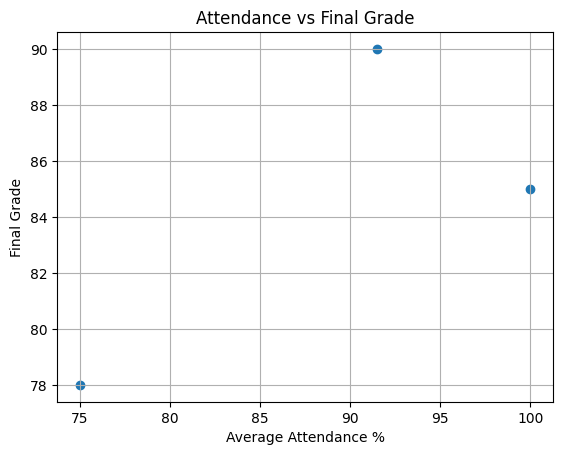

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df_attendance['avg_attendance'], df_attendance['final_grade_numeric'])
plt.xlabel("Average Attendance %")
plt.ylabel("Final Grade")
plt.title("Attendance vs Final Grade")
plt.grid(True)
plt.show()


In [7]:
df_wellbeing = pd.read_sql("""
WITH grades AS (
    SELECT
        student_id,
        AVG(final_grade_numeric) AS avg_grade
    FROM enrollments
    GROUP BY student_id
),
stress AS (
    SELECT
        student_id,
        AVG(stress_level) AS avg_stress,
        AVG(mood_score)   AS avg_mood
    FROM wellbeing_scores
    GROUP BY student_id
)
SELECT
    s.first_name,
    s.last_name,
    g.avg_grade,
    st.avg_stress,
    st.avg_mood
FROM students s
JOIN grades g ON s.student_id = g.student_id
JOIN stress st ON s.student_id = st.student_id;
""", con=engine)

df_wellbeing


,first_name,last_name,avg_grade,avg_stress,avg_mood
0,Mehar,Arora,94.000000,7.0,5.0
1,Riya,Sondhi,87.500000,5.0,7.0
2,Vedant,Sharma,87.250000,4.0,9.0
3,Samaira,Samaira,84.333333,7.0,7.0


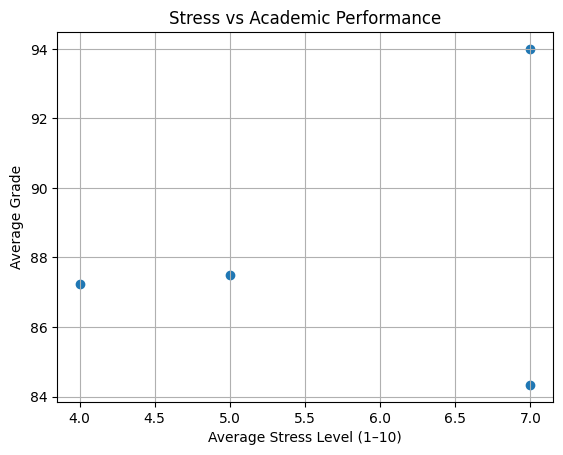

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df_wellbeing['avg_stress'], df_wellbeing['avg_grade'])
plt.xlabel("Average Stress Level (1–10)")
plt.ylabel("Average Grade")
plt.title("Stress vs Academic Performance")
plt.grid(True)
plt.show()
